In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
#Past two years data 
amazon = yf.download("AMZN", start="2022-1-1" , end="2024-1-1")
apple = yf.download("AAPL", start="2022-1-1" , end="2024-1-1")
google = yf.download("GOOGL", start="2022-1-1" , end="2024-1-1")
microsoft = yf.download("MSFT", start="2022-1-1" , end="2024-1-1")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
amazon.to_csv("Amzn.csv")
apple.to_csv("Aapl.csv")
google.to_csv("Googl.csv")
microsoft.to_csv("Msft.csv")

In [4]:
df = pd.read_csv("C:/Users/asus/OneDrive/Desktop/WIDS/Week-2 Assignment/Amzn.csv", index_col="Date")
df1 = pd.read_csv("C:/Users/asus/OneDrive/Desktop/WIDS/Week-2 Assignment/Aapl.csv", index_col="Date")
df2 = pd.read_csv("C:/Users/asus/OneDrive/Desktop/WIDS/Week-2 Assignment/Googl.csv", index_col="Date")
df3 = pd.read_csv("C:/Users/asus/OneDrive/Desktop/WIDS/Week-2 Assignment/Msft.csv", index_col="Date")

In [5]:
df.reset_index(inplace=True)
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       501 non-null    float64
 1   High       501 non-null    float64
 2   Low        501 non-null    float64
 3   Close      501 non-null    float64
 4   Adj Close  501 non-null    float64
 5   Volume     501 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.4 KB


In [7]:
df[['Open', 'Close', 'Volume']].corr()

,Open,Close,Volume
Open,1.000000,0.993397,-0.176066
Close,0.993397,1.000000,-0.180068
Volume,-0.176066,-0.180068,1.000000


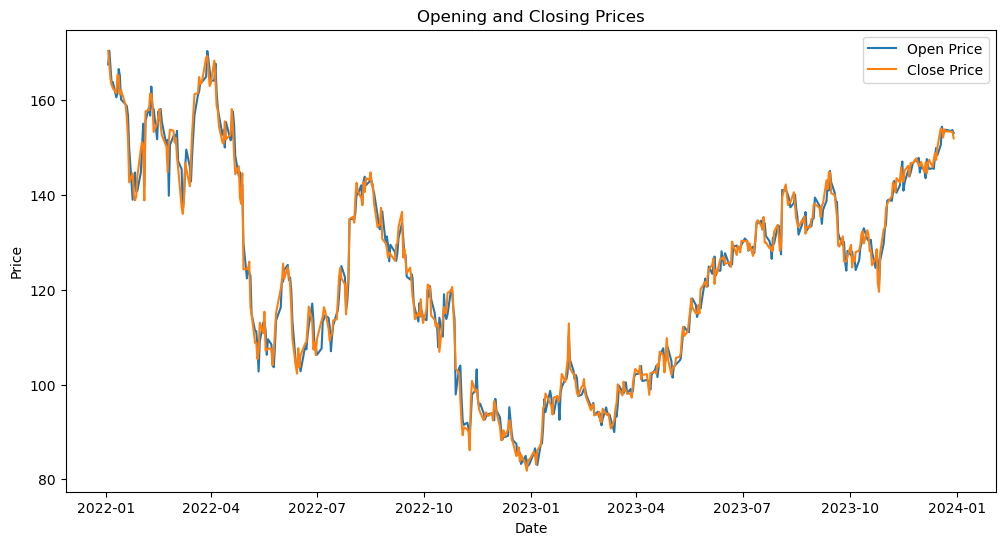

In [8]:
#visualize Opening and Closing Price
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label="Open Price")
plt.plot(df['Close'], label="Close Price")
plt.title("Opening and Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

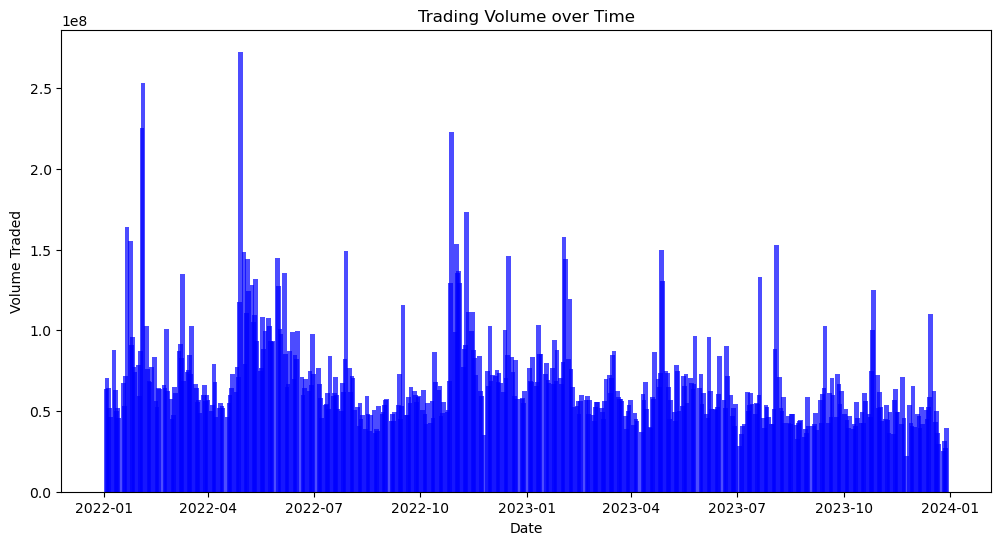

In [9]:
#Trading Volume Visualization
plt.figure(figsize=(12,6))
plt.bar(df.index, df['Volume'], color='b', alpha=0.7, width=4)
plt.xlabel("Date")
plt.ylabel("Volume Traded")
plt.title("Trading Volume over Time")
plt.show()

In [10]:
#Plotting Moving Averages!
#calculating 50 days moving averages
df["50MA"] = df[['Close']].rolling(50).mean()
#Calculating 200 days moving averages 
df["200MA"] = df[['Close']].rolling(200).mean()

In [11]:
df

,Open,High,Low,Close,Adj Close,Volume,50MA,200MA
Date,,,,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000,NaN,NaN
2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000,NaN,NaN
2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000,NaN,NaN
2022-01-06,163.450500,164.800003,161.936996,163.253998,163.253998,51958000,NaN,NaN
2022-01-07,163.839005,165.243500,162.031006,162.554001,162.554001,46606000,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-12-22,153.770004,154.350006,152.710007,153.419998,153.419998,29480100,141.2430,126.54460
2023-12-26,153.559998,153.979996,153.029999,153.410004,153.410004,25067200,141.7154,126.85800
2023-12-27,153.559998,154.779999,153.119995,153.339996,153.339996,31434700,142.1312,127.16255


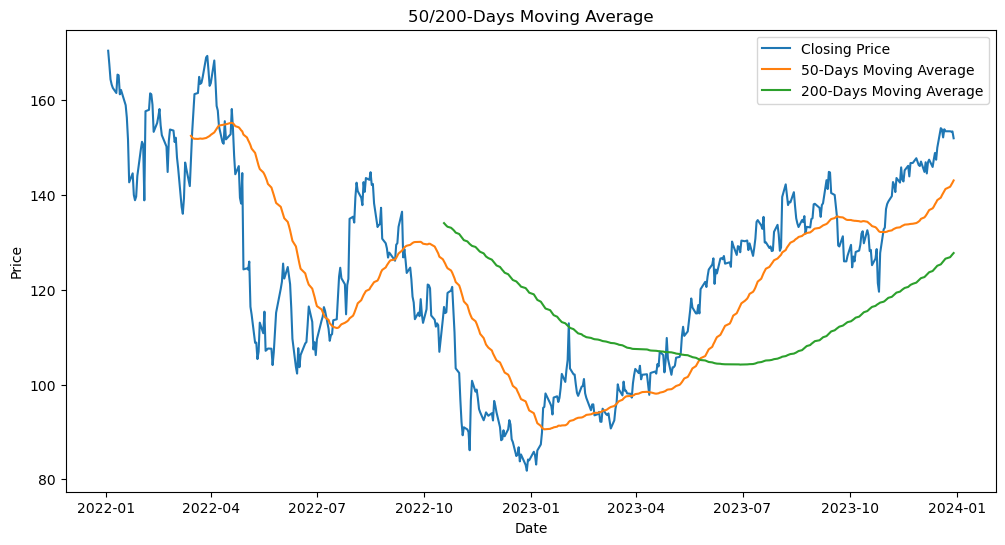

In [34]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Closing Price")
plt.plot(df['50MA'], label="50-Days Moving Average")
plt.plot(df['200MA'], label="200-Days Moving Average")
plt.title("50/200-Days Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [13]:
#Calculating Daily and Monthly returns of the stock by using pct_change() function
#Calculating daily returns
df['Daily-Returns'] = df['Close'].pct_change()
#Calculating monthly returns 
df['Monthly-Returns'] = df['Close'].pct_change(21) #Assuming 21 trading days in a Month

In [14]:
df

,Open,High,Low,Close,Adj Close,Volume,50MA,200MA,Daily-Returns,Monthly-Returns
Date,,,,,,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000,NaN,NaN,NaN,NaN
2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000,NaN,NaN,-0.016916,NaN
2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000,NaN,NaN,-0.018893,NaN
2022-01-06,163.450500,164.800003,161.936996,163.253998,163.253998,51958000,NaN,NaN,-0.006711,NaN
2022-01-07,163.839005,165.243500,162.031006,162.554001,162.554001,46606000,NaN,NaN,-0.004288,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,153.770004,154.350006,152.710007,153.419998,153.419998,29480100,141.2430,126.54460,-0.002730,0.045736
2023-12-26,153.559998,153.979996,153.029999,153.410004,153.410004,25067200,141.7154,126.85800,-0.000065,0.045455
2023-12-27,153.559998,154.779999,153.119995,153.339996,153.339996,31434700,142.1312,127.16255,-0.000456,0.037975


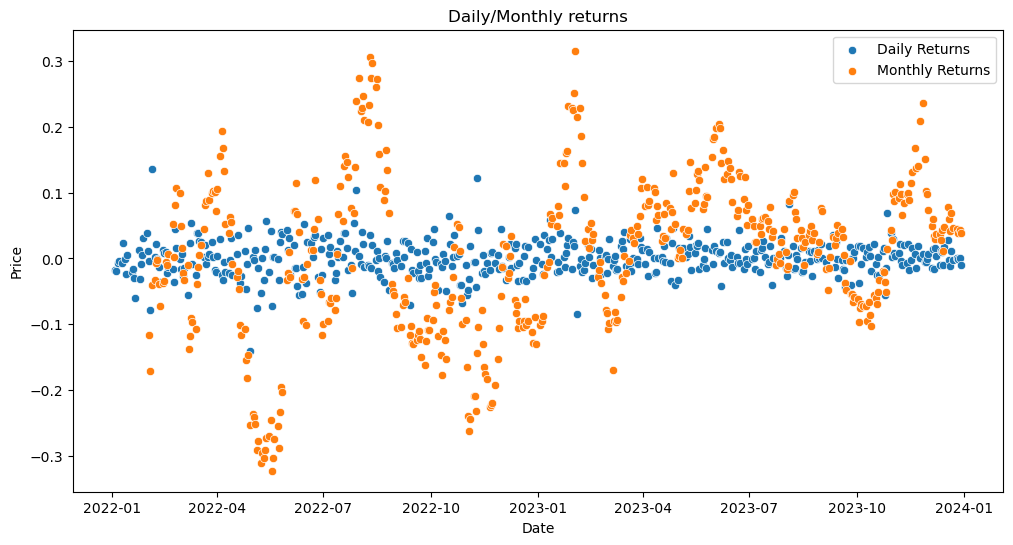

In [15]:
plt.figure(figsize=(12,6))

sns.scatterplot(df['Daily-Returns'], label="Daily Returns")
sns.scatterplot(df['Monthly-Returns'], label="Monthly Returns")
plt.title("Daily/Monthly returns")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

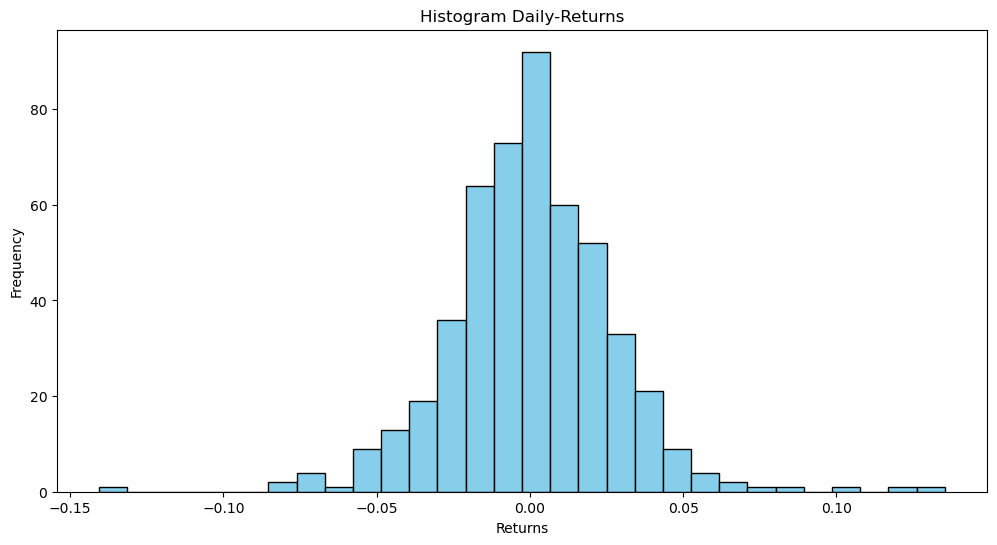

In [16]:
#Histogram for daily returns
plt.figure(figsize=(12,6))

plt.hist(df['Daily-Returns'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram Daily-Returns")
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

In [17]:
#correlation between different stocks daily returns and volume of sales
corr = df[["Daily-Returns", "Volume"]].corr()
corr

,Daily-Returns,Volume
Daily-Returns,1.000000,-0.011332
Volume,-0.011332,1.000000


In [22]:
df1.reset_index(inplace=True)
df1['Date']=pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       501 non-null    float64
 1   High       501 non-null    float64
 2   Low        501 non-null    float64
 3   Close      501 non-null    float64
 4   Adj Close  501 non-null    float64
 5   Volume     501 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.4 KB


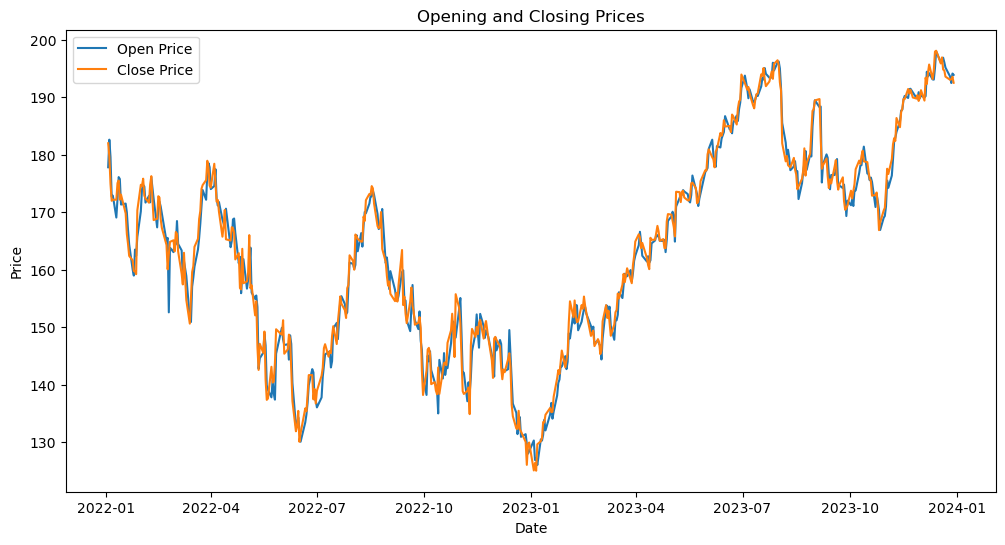

In [24]:
#Plot for opening and closing price
plt.figure(figsize=(12, 6))
plt.plot(df1['Open'], label="Open Price")
plt.plot(df1['Close'], label="Close Price")
plt.title("Opening and Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

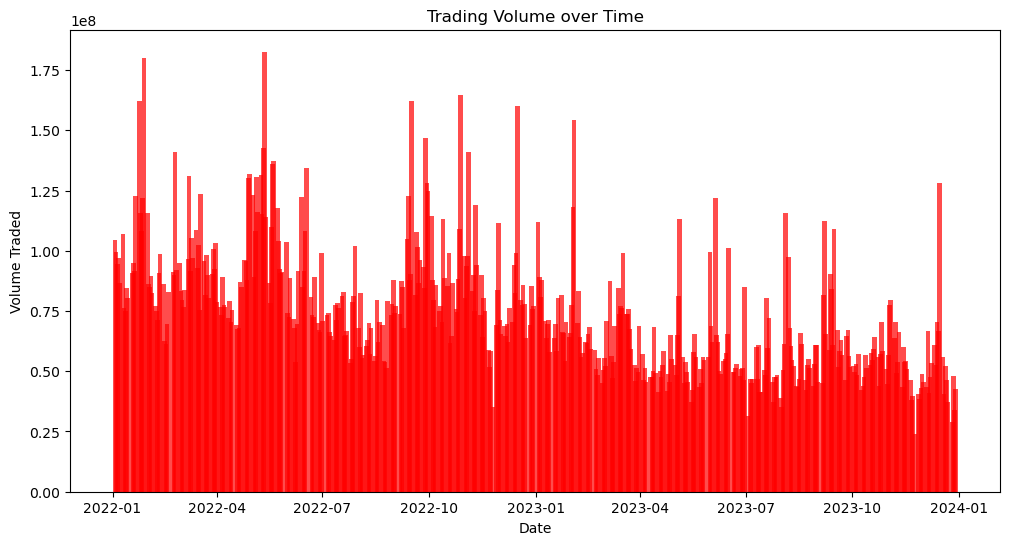

In [27]:
#Trading Volume Visualization
plt.figure(figsize=(12,6))
plt.bar(df1.index, df1['Volume'], color='r', alpha=0.7, width=4)
plt.xlabel("Date")
plt.ylabel("Volume Traded")
plt.title("Trading Volume over Time")
plt.show()

In [28]:
#Plotting Moving Averages!
df1["50MA"] = df1[['Close']].rolling(50).mean()
df1["200MA"] = df1[['Close']].rolling(200).mean()

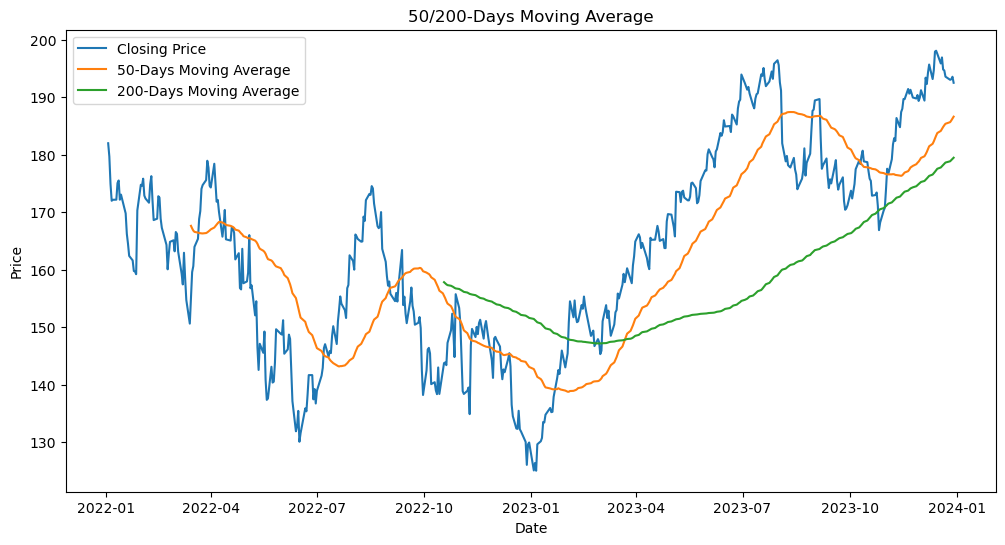

In [33]:
plt.figure(figsize=(12,6))
plt.plot(df1['Close'], label="Closing Price")
plt.plot(df1['50MA'], label="50-Days Moving Average")
plt.plot(df1['200MA'], label="200-Days Moving Average")
plt.title("50/200-Days Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [35]:
#Calculating Daily and Monthly returns of the stock by using pct_change() function
df1['Daily-Returns'] = df1['Close'].pct_change()
df1['Monthly-Returns'] = df1['Close'].pct_change(21) #Assuming 21 trading days in a Month

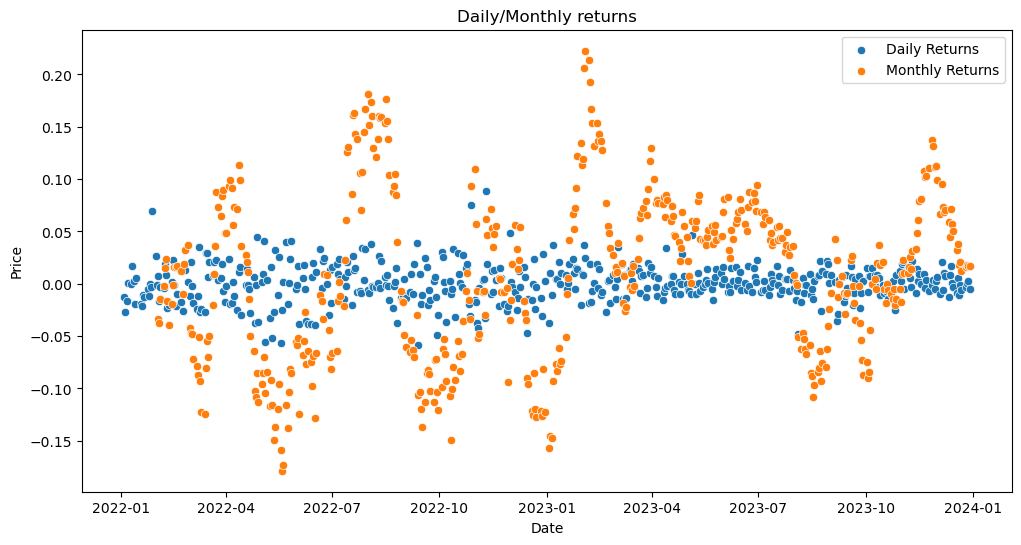

In [36]:
plt.figure(figsize=(12,6))

sns.scatterplot(df1['Daily-Returns'], label="Daily Returns")
sns.scatterplot(df1['Monthly-Returns'], label="Monthly Returns")
plt.title("Daily/Monthly returns")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

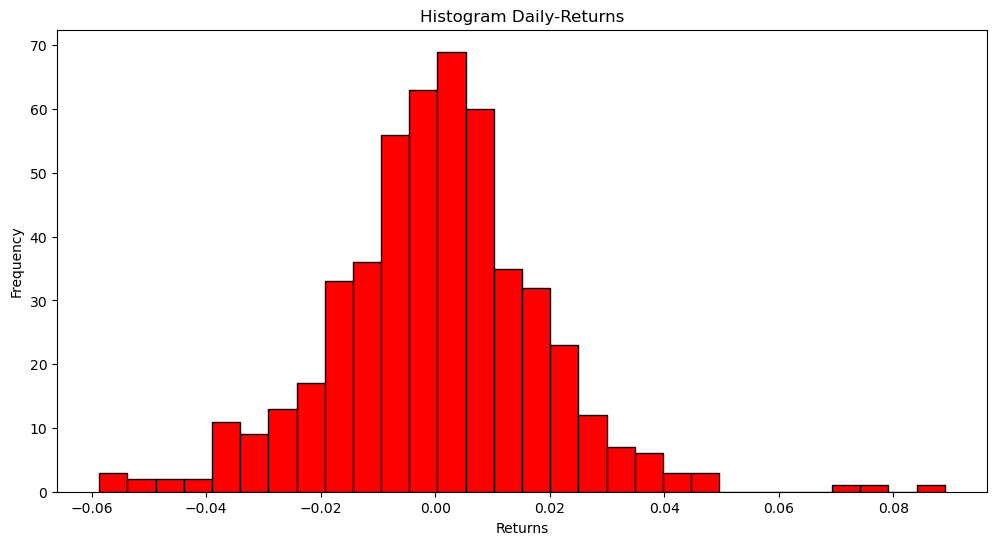

In [37]:
#Histogram for daily returns
plt.figure(figsize=(12,6))

plt.hist(df1['Daily-Returns'], bins=30, color='red', edgecolor='black')
plt.title("Histogram Daily-Returns")
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

In [64]:
#Correlation
corr = df1[["Daily-Returns", "Volume"]].corr()
corr

,Daily-Returns,Volume
Daily-Returns,1.000000,-0.151288
Volume,-0.151288,1.000000


In [41]:
df2.reset_index(inplace=True)
df2['Date']=pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)

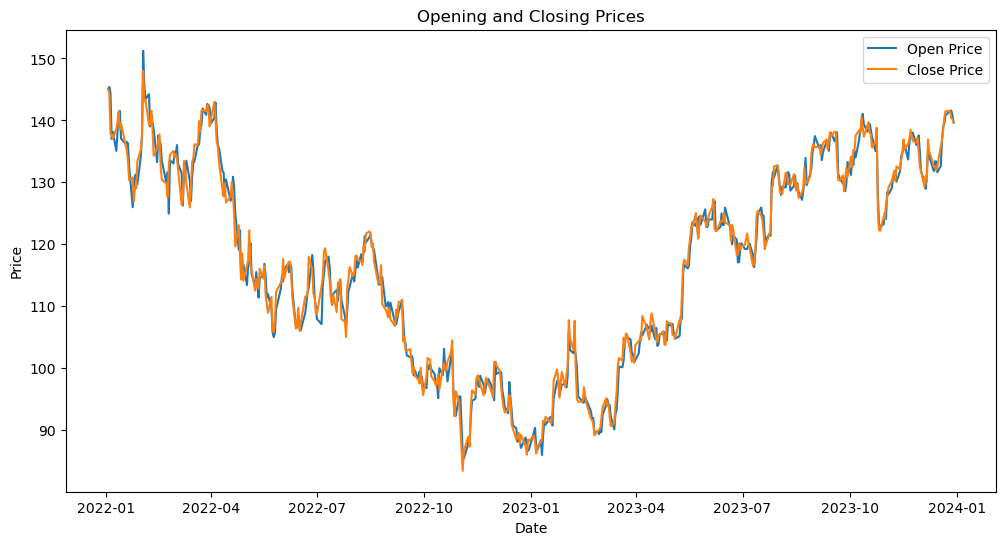

In [43]:
#Plot for opening and closing price
plt.figure(figsize=(12, 6))
plt.plot(df2['Open'], label="Open Price")
plt.plot(df2['Close'], label="Close Price")
plt.title("Opening and Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

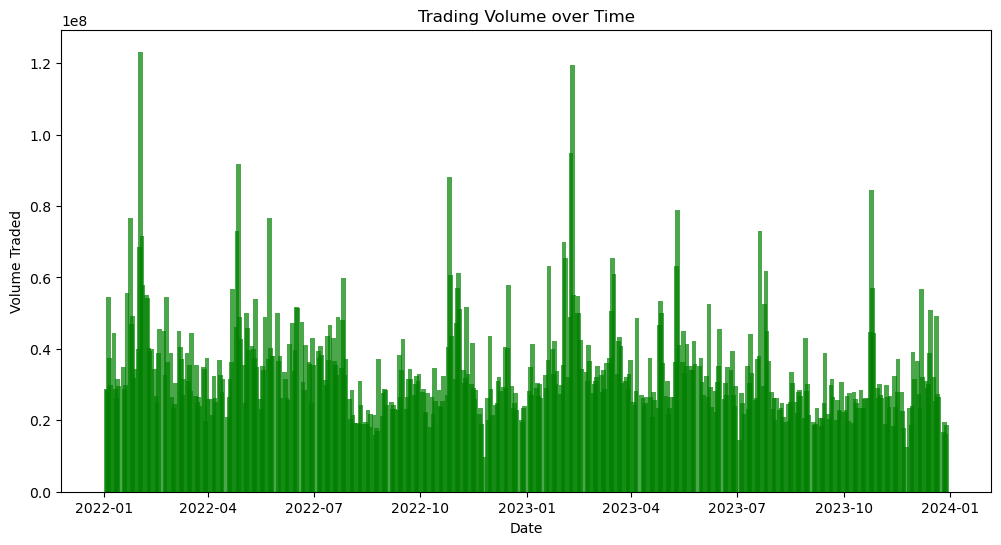

In [45]:
#Trading Volume Visualization
plt.figure(figsize=(12,6))
plt.bar(df2.index, df2['Volume'], color='g', alpha=0.7, width=4)
plt.xlabel("Date")
plt.ylabel("Volume Traded")
plt.title("Trading Volume over Time")
plt.show()

In [46]:
#Plotting Moving Averages! (using Opening prices)
df2["50MA"] = df2[['Open']].rolling(50).mean()
df2["200MA"] = df2[['Open']].rolling(200).mean()

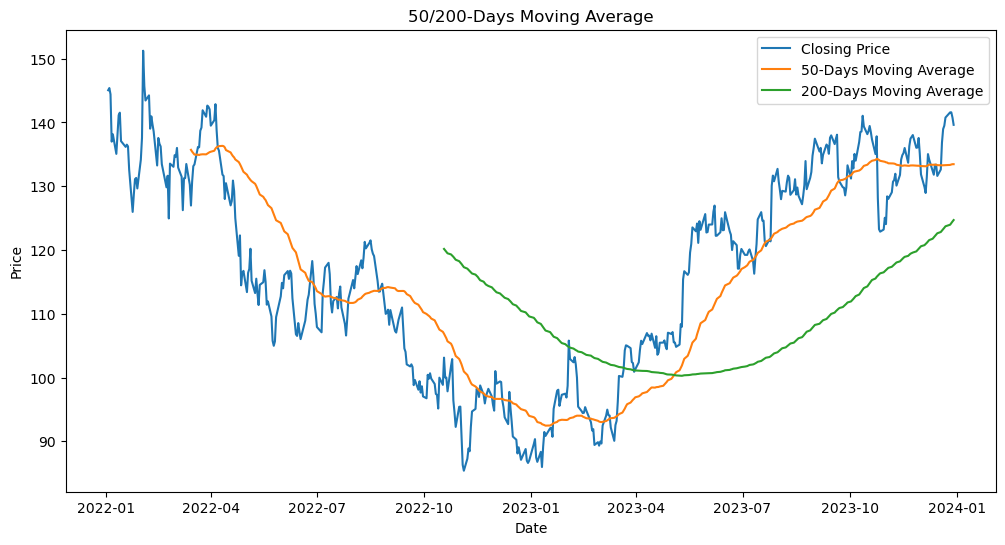

In [48]:
plt.figure(figsize=(12,6))
plt.plot(df2['Open'], label="Closing Price") #Since I have used opening Price to calculate the 50/200 MA
plt.plot(df2['50MA'], label="50-Days Moving Average")
plt.plot(df2['200MA'], label="200-Days Moving Average")
plt.title("50/200-Days Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [50]:
#Calculating Daily and Monthly returns of the stock by using pct_change() function, using opening price 
df2['Daily-Returns'] = df2['Open'].pct_change()
df2['Monthly-Returns'] = df2['Open'].pct_change(21)

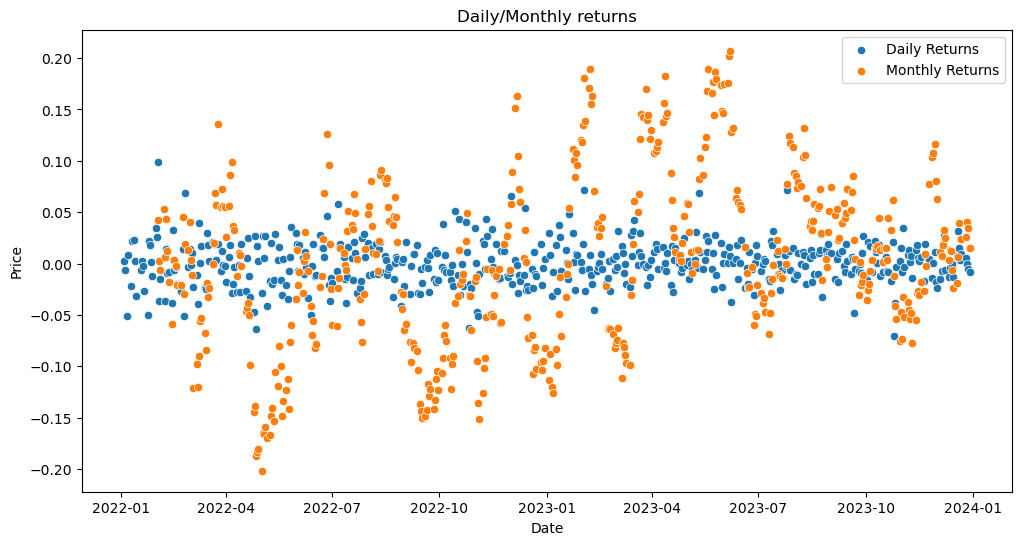

In [51]:
plt.figure(figsize=(12,6))

sns.scatterplot(df2['Daily-Returns'], label="Daily Returns")
sns.scatterplot(df2['Monthly-Returns'], label="Monthly Returns")
plt.title("Daily/Monthly returns")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

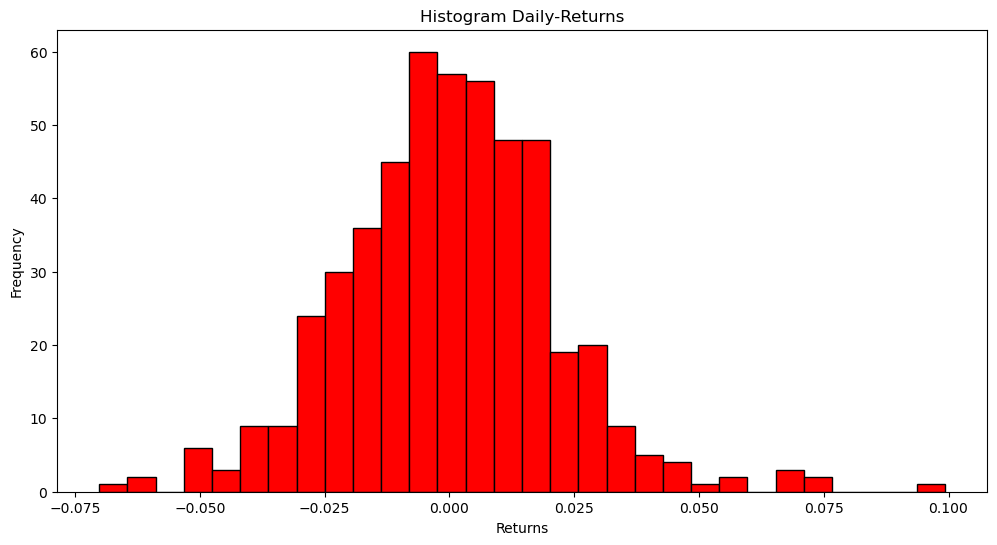

In [52]:
#Histogram for daily returns, where daily returns are being calculated using Opening Price
plt.figure(figsize=(12,6))

plt.hist(df2['Daily-Returns'], bins=30, color='red', edgecolor='black')
plt.title("Histogram Daily-Returns")
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

In [65]:
corr = df2[["Daily-Returns", "Volume"]].corr()
corr

,Daily-Returns,Volume
Daily-Returns,1.000000,-0.050756
Volume,-0.050756,1.000000


In [53]:
df3.reset_index(inplace=True)
df3['Date']=pd.to_datetime(df3['Date'])
df3.set_index('Date', inplace=True)

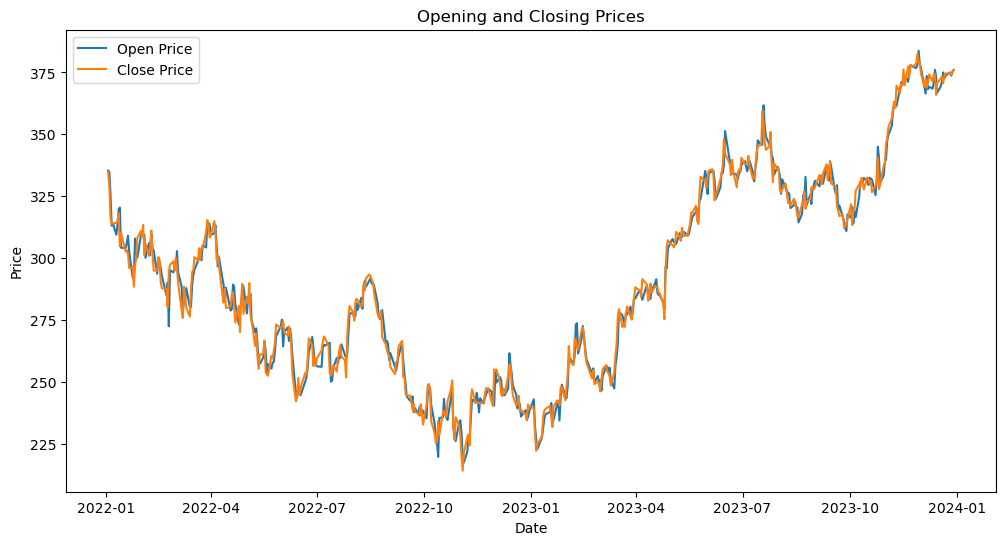

In [54]:
#Plot for opening and closing price
plt.figure(figsize=(12, 6))
plt.plot(df3['Open'], label="Open Price")
plt.plot(df3['Close'], label="Close Price")
plt.title("Opening and Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

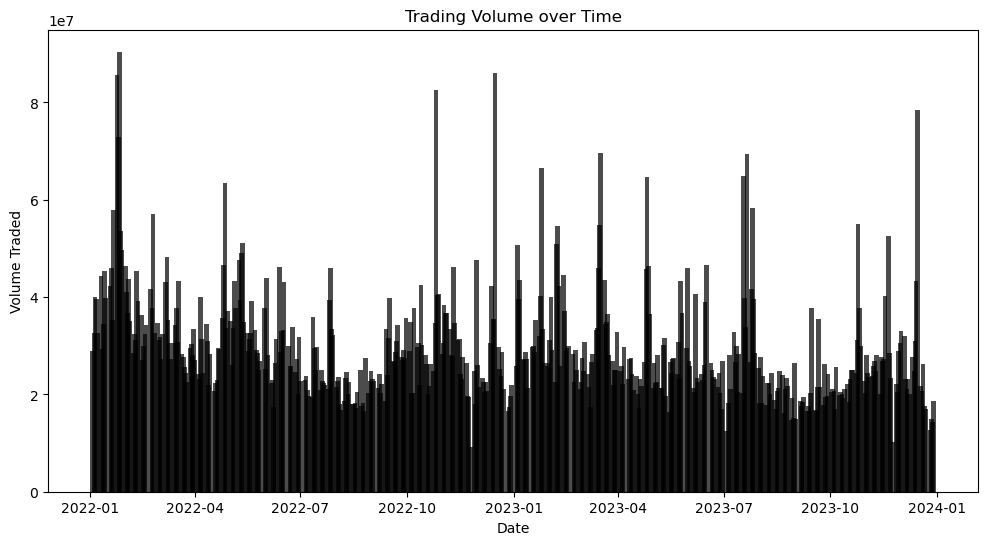

In [57]:
#Trading Volume Visualization
plt.figure(figsize=(12,6))
plt.bar(df3.index, df3['Volume'], color='black', alpha=0.7, width=4)
plt.xlabel("Date")
plt.ylabel("Volume Traded")
plt.title("Trading Volume over Time")
plt.show()

In [58]:
#Plotting Moving Averages! (using Opening prices)
df3["50MA"] = df3[['Open']].rolling(50).mean()
df3["200MA"] = df3[['Open']].rolling(200).mean()

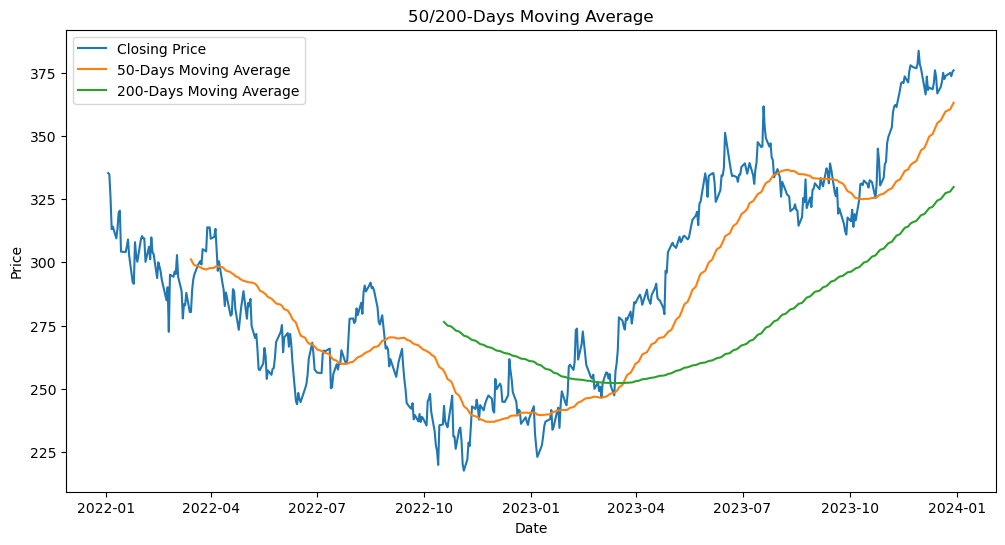

In [59]:
plt.figure(figsize=(12,6))

plt.plot(df3['Open'], label="Closing Price") #Since I have used opening Price to calculate the 50/200 MA
plt.plot(df3['50MA'], label="50-Days Moving Average")
plt.plot(df3['200MA'], label="200-Days Moving Average")
plt.title("50/200-Days Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [60]:
#Calculating Daily and Monthly returns of the stock by using pct_change() function, using opening price 
df3['Daily-Returns'] = df3['Open'].pct_change()
df3['Monthly-Returns'] = df3['Open'].pct_change(21)

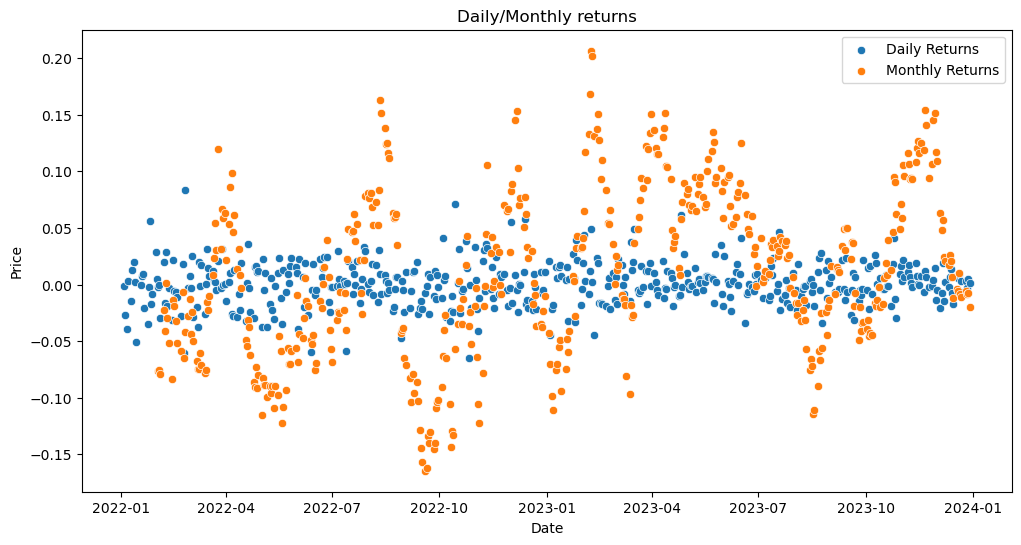

In [61]:
plt.figure(figsize=(12,6))

sns.scatterplot(df3['Daily-Returns'], label="Daily Returns")
sns.scatterplot(df3['Monthly-Returns'], label="Monthly Returns")
plt.title("Daily/Monthly returns")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

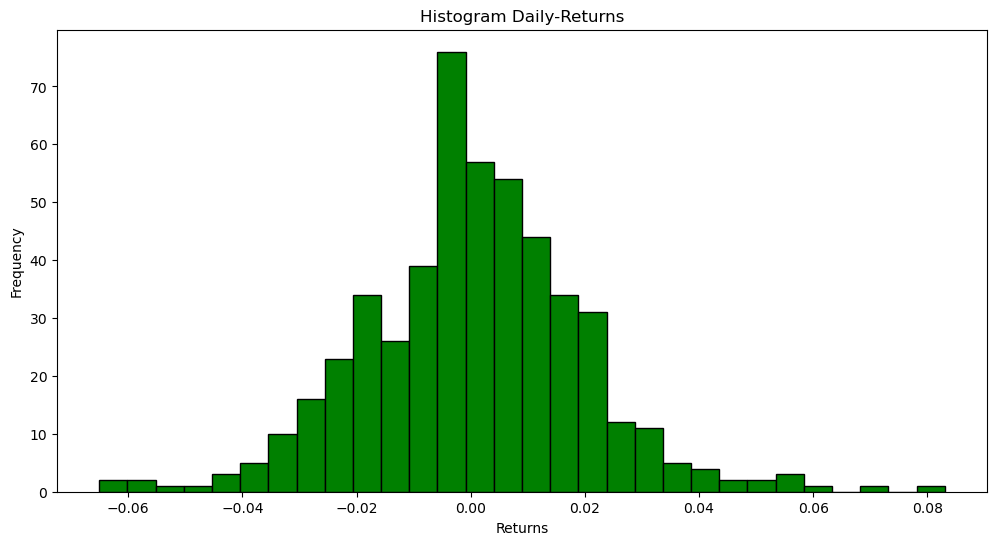

In [63]:
#Histogram for daily returns, where daily returns are being calculated using Opening Price
plt.figure(figsize=(12,6))

plt.hist(df3['Daily-Returns'], bins=30, color='green', edgecolor='black')
plt.title("Histogram Daily-Returns")
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

In [66]:
corr = df3[["Daily-Returns", "Volume"]].corr()
corr

,Daily-Returns,Volume
Daily-Returns,1.000000,-0.065779
Volume,-0.065779,1.000000


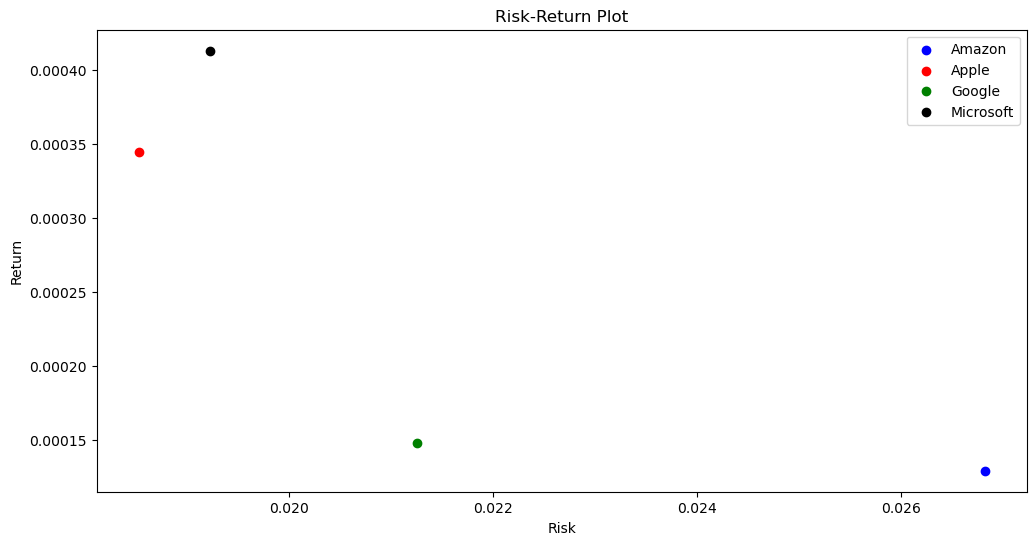

In [74]:
#Now plotting risk return plot
#Plotting risk return plot 
risk = df['Daily-Returns'].std()
avg_return = df['Daily-Returns'].mean()

risk1 = df1['Daily-Returns'].std()
avg_return1 = df1['Daily-Returns'].mean()

risk2 = df2['Daily-Returns'].std()
avg_return2 = df2['Daily-Returns'].mean()

risk3 = df3['Daily-Returns'].std()
avg_return3 = df3['Daily-Returns'].mean()

plt.figure(figsize=(12,6))
plt.scatter(risk, avg_return, label="Amazon", color='blue', alpha=1)
plt.scatter(risk1, avg_return1, label="Apple", color='red', alpha=1)
plt.scatter(risk2, avg_return2, label="Google", color='green', alpha=1)
plt.scatter(risk3, avg_return3, label="Microsoft", color='black', alpha=1)
plt.title("Risk-Return Plot")
plt.xlabel("Risk")
plt.ylabel("Return")
plt.legend()
plt.show()